# Assignment Week 2 
Answer each question completely. Include your code and summarize what you see in a brief narrative.

### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('car_prices.csv', low_memory=False)

# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- vin: unique identifier of the car. 
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- seller: who sold the car.  
- mmr: estimated wholesale price of the car.  
- sellingprice: actual sales price of the car.  
- saledate: date and time of the sale. 

# Question 1. Determine the number of missing values in each column.

In [3]:
print("The columns that are missing values are as follows:")
print(df.isna().sum())

The columns that are missing values are as follows:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


### Sample narrative description.

##### Transmission has the maximum NULL values, but it seems like over 85% people has Automatic transmission so it can be neglected. 


# Question 2. Check the data types. Which columns are coded to the incorrect type? If any, correct them.

In [4]:
# code
df['mmr'] = pd.to_numeric(df['mmr'], errors='coerce')
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558811 non-null  float64
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 68.2+ MB


### Sample narrative description.


###### The estimated price (MMR) which should be a numeric value, it was a object so it is converted to float. 

###### The condition which is given in the scale of 1-5, it was an object, converted to float

# Question 3. Analyze the 'make' column. Comment on what you observe. Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 
Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [5]:
# code
df['make'].replace(to_replace='land rover', value='landrover',inplace= True)
df['make'].replace(to_replace='mercedes-b', value='mercedes-benz',inplace= True)
df['make'].replace(to_replace='vw', value='volkswagen',inplace= True)
df['make'].replace(to_replace='ford truck', value='ford tk',inplace= True)
df['make'].replace(to_replace='gmc truck', value='gmc tk',inplace= True)
df['make'].replace(to_replace='chev truck', value='chevrolet tk',inplace= True)
df['make']=df['make'].str.lower()
#df['make']= df['make'].replace(to_replace=' tk',value='',inplace=True)
set(df['make'])

{'acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chevrolet tk',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'geo',
 'gmc',
 'gmc tk',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 nan,
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo'}

In [12]:
topcars= df[df['make'].isin(['ford','chevrolet','nissan','toyota','dodge'])]

In [22]:
# ford=df[df['make']=='ford']
# plt.xticks(rotation=90)
# sns.countplot(x=ford['year'])

In [23]:
# chev=df[df['make']=='chevrolet']
# plt.xticks(rotation=90)
# sns.countplot(x=chev['year'])

<Figure size 720x360 with 0 Axes>

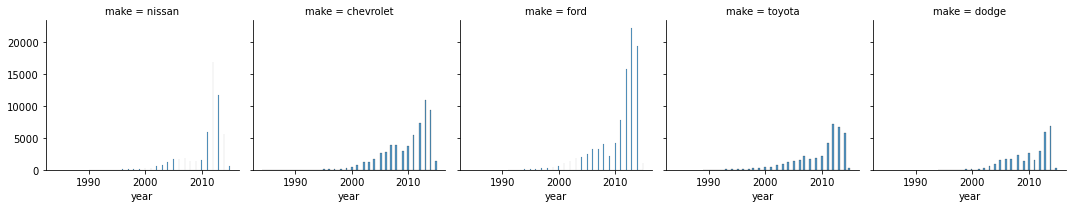

In [27]:
#g = sns.FacetGrid(topcars, col="make")
plt.figure(figsize=(10,5))

#plt.title('Number of cars sold as per their make in respective years')
g = sns.FacetGrid(topcars, col="make",)
g.map(sns.histplot, "year")
plt.show()

In [33]:
print('Year 2011 ',len(df[df['year'] == 2011]))
print('Year 2012 ',len(df[df['year'] == 2012]))
print('Year 2013 ',len(df[df['year'] == 2013]))
print('Year 2014 ',len(df[df['year'] == 2014]))
print('Year 2015 ',len(df[df['year'] == 2015]))


Year 2011  48548
Year 2012  102315
Year 2013  98168
Year 2014  81070
Year 2015  9437


### Sample narrative description.

###### We got to know that  the top 5 companies whose second hand cars are sold. maximum.  The cars of 'Ford' has been sold maximum than other makes. It is observed that the selling of the used cars after 2012 has decreased considerably due to some reason.


# Question 4. Analyze the relationship between the wholeprice 'mmr' and the sales price. What is the overall correlation? What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

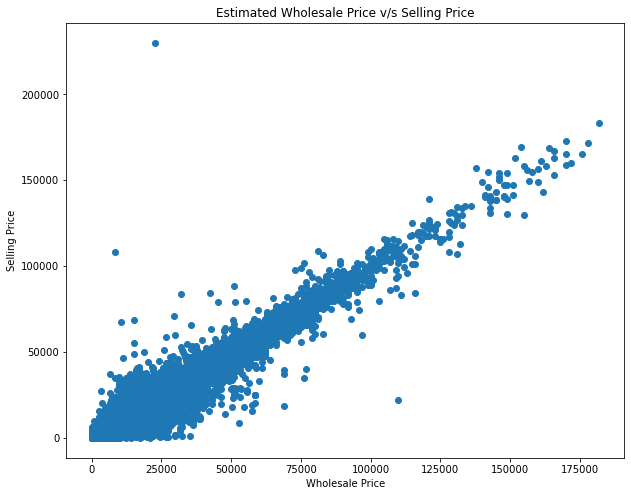

In [24]:
# code
plt.figure(figsize=(10,8))
plt.scatter(x=df['mmr'], y=df['sellingprice'],alpha=1)
plt.title('Estimated Wholesale Price v/s Selling Price')
plt.xlabel('Wholesale Price')
plt.ylabel('Selling Price')
plt.show()

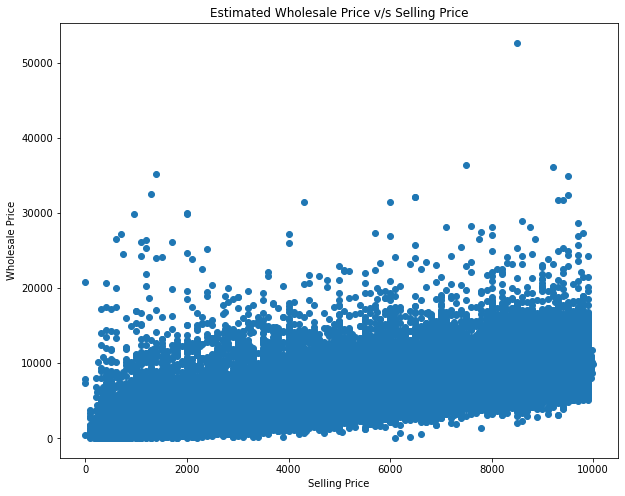

In [38]:
dfnotlinear = df[(df['sellingprice']>0) & (df['sellingprice']<10000)]

plt.figure(figsize=(10,8))
plt.scatter(x=dfnotlinear['sellingprice'], y=dfnotlinear['mmr'],alpha=1,)
plt.title('Estimated Wholesale Price v/s Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Wholesale Price')
plt.show()

<Figure size 1440x1080 with 0 Axes>

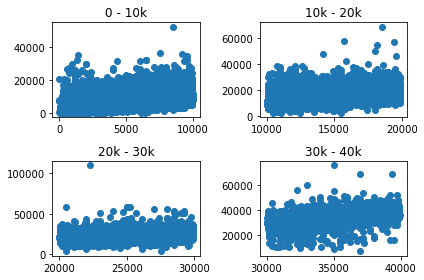

In [158]:
dfnotlinear1 = df[(df['sellingprice']>0) & (df['sellingprice']<10000)]
dfnotlinear2 = df[(df['sellingprice']>10000) & (df['sellingprice']<20000)]
dfnotlinear3 = df[(df['sellingprice']>20000) & (df['sellingprice']<30000)]
dfnotlinear4 = df[(df['sellingprice']>30000) & (df['sellingprice']<40000)]
plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(dfnotlinear1['sellingprice'], dfnotlinear1['mmr'])
axs[0, 0].set_title('0 - 10k')
axs[0, 1].scatter(dfnotlinear2['sellingprice'], dfnotlinear2['mmr'])
axs[0, 1].set_title('10k - 20k')
axs[1, 0].scatter(dfnotlinear3['sellingprice'], dfnotlinear3['mmr'])
axs[1, 0].set_title('20k - 30k')
axs[1, 1].scatter(dfnotlinear4['sellingprice'], dfnotlinear4['mmr'])
axs[1, 1].set_title('30k - 40k')
plt.tight_layout()

In [70]:

dfnotlinear = df[(df['sellingprice']>60000) & (df['sellingprice']<260000)]
dfnotlinear['factorr'] = dfnotlinear['sellingprice']/dfnotlinear['mmr']
A = len(dfnotlinear[dfnotlinear['factorr'] <1.0])
B = len(dfnotlinear[dfnotlinear['factorr'] >1.0])

print('Number of cars sold less than MMR: ',A)
print('Number of cars sold higher than MMR: ',B)
print(A/(A+B))

Number of cars sold less than MMR:  763
Number of cars sold higher than MMR:  755
0.502635046113307


<ipython-input-70-4997441bb577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnotlinear['factorr'] = dfnotlinear['sellingprice']/dfnotlinear['mmr']


In [50]:
print(len(dfnotlinear['make'].value_counts()))
print(len(df['make'].value_counts()))

54
63


In [99]:
# notlinearmake = dfnotlinear['make']
# dfmake = df['make']
# print(set(dfmake) - set(notlinearmake))

In [98]:
# expcars= df[df['make'].isin(['airstream',
#  'aston martin',
#  'bentley',
#  'ferrari',
#  'fisker',
#  'lamborghini',
#  'lotus',
#  'rolls-royce',
#  'tesla'])]

# (expcars[expcars['diffSellingMMR']<-10000])

In [101]:
# df[df['mmr'] == df['sellingprice']]
# 11224/558837

In [77]:
df['diffSellingMMR'] = df['sellingprice'] - df['mmr']

### Sample narrative description.

##### This plot suggests that the selling price and wholesale price has linear relation. There are some outliers such as Ford escape which has estimated price of  28000 but it was sold 10 times more than the estimated price. Also there is Mercedes G class sold in 20% of estimated price even though the condition was 4.8 out of 5.

##### In the range of selling price from 0 to 10000, the relation is not linear.  Out of total 210068 cars, 125109 (Almost 60%) cars were sold in the lesser value than estimated value. This suggest that the majority of transactions on used cars are done in the lower range.

###### It is seen that the from selling value of 10000 onwards, the ratio of number of cars sold less than MMR to the number of cars sold higher than MMR is ~50% 

###### Only 2% of the total cars got sold  as per the estimated price, rest of the time, the selling price is either higher ot less than MMR/estimated price. To get the precise idea, we can check the how much the selling price vary as per the estimated price

###### The 9 expensive car companies such as Tesla, Lamborghini and etc, half of the cars are sold above the estimated price. Also for the cars which are sold less than estimated price, the change of percent from the estimated price is not more than 9%. The cars from expensive brands has less depreciation.

# Question 5. How does the distribution of sales price vary by make for cars made between 2010-2015? Use the 10 most common makes (your cleaned version of this column). Create a graph that answers this question.

In [113]:
# code

makevalues = df['make'].value_counts()
makevalues.index

Index(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai',
       'bmw', 'kia', 'chrysler', 'mercedes-benz', 'jeep', 'infiniti',
       'volkswagen', 'lexus', 'gmc', 'mazda', 'cadillac', 'acura', 'audi',
       'lincoln', 'buick', 'subaru', 'ram', 'pontiac', 'mitsubishi', 'volvo',
       'mini', 'saturn', 'mercury', 'land rover', 'scion', 'jaguar', 'porsche',
       'suzuki', 'fiat', 'hummer', 'saab', 'smart', 'oldsmobile', 'isuzu',
       'landrover', 'maserati', 'bentley', 'mercedes', 'plymouth',
       'aston martin', 'tesla', 'ferrari', 'geo', 'rolls-royce', 'gmc tk',
       'fisker', 'ford tk', 'lamborghini', 'daewoo', 'dodge tk', 'lotus',
       'mazda tk', 'airstream', 'hyundai tk', 'dot', 'chevrolet tk'],
      dtype='object')

In [139]:
top10cars = df[df['make'].isin(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai',
       'bmw', 'kia', 'chrysler'])]

In [146]:
top10cars = top10cars[top10cars['year'].isin([2010,2011,2012,2013,2014,2015])]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,diffSellingMMR


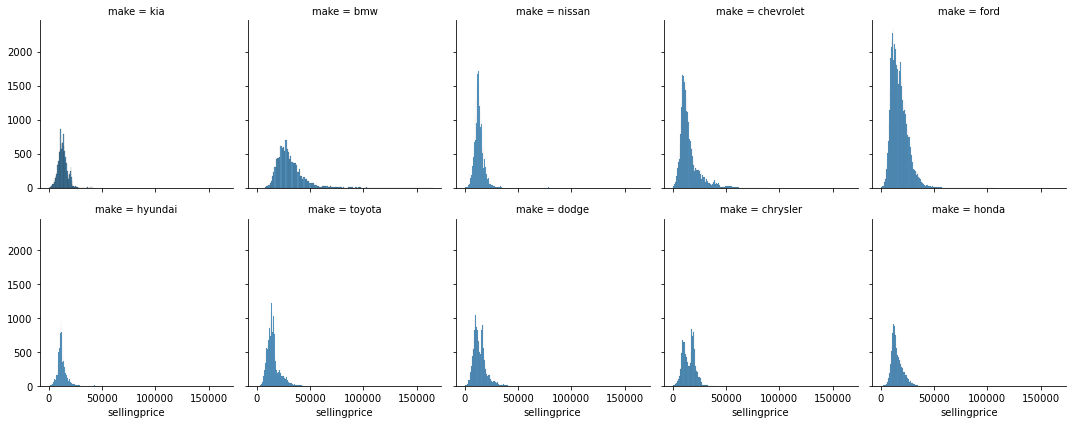

In [148]:
top10cars
g = sns.FacetGrid(top10cars, col="make",col_wrap=5, sharex=True, sharey=True, dropna=True)
#g = sns.FacetGrid(col='make',col_wrap = 4, margin_titles=True, height=3, aspect= 1.33) #4/3 ratio
g.map(sns.histplot, "sellingprice")
plt.show()

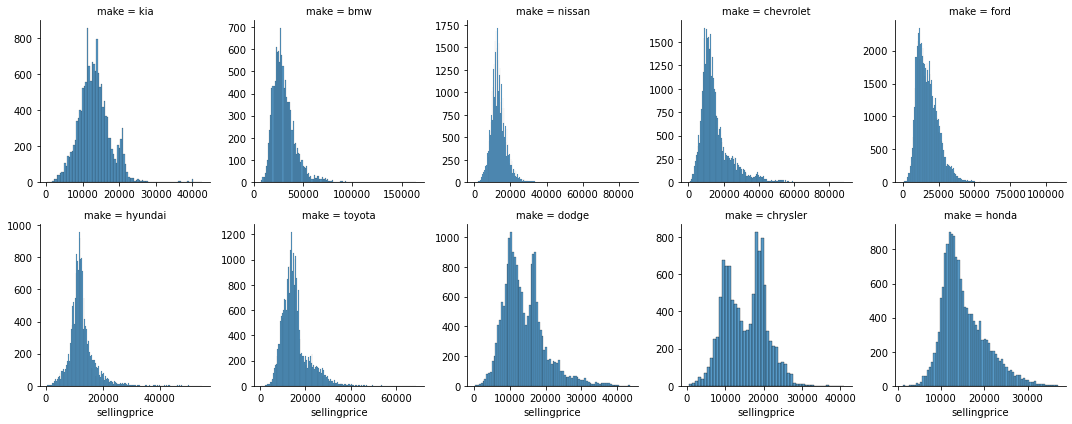

In [149]:
top10cars
g = sns.FacetGrid(top10cars, col="make",col_wrap=5, sharex=False, sharey=False, dropna=True)
#g = sns.FacetGrid(col='make',col_wrap = 4, margin_titles=True, height=3, aspect= 1.33) #4/3 ratio
g.map(sns.histplot, "sellingprice")
plt.show()

### Sample narrative description.

#### The distribution of the top 10 car makes follows the normal distribution except the three makes (dodge, kia and chrysler). Kia has trimodal normal distribution and other two has bimodal normal distribution.  

Doubt: Should scale in the facetgrid to be the same or it depends on any factor?